# Mesa: Agent-based modeling in Python 3+

## Modelo base

In [59]:
# Importamos las clases que se requieren para manejar los agentes (Agent) 
# y su entorno (Model).
# Cada modelo puede contener múltiples agentes.
from mesa import Agent, Model 

# Debido a que necesitamos que existan más de un agente por celda, elegimos 
# ''MultiGrid''.
from mesa.space import MultiGrid

# Con ''SimultaneousActivation, hacemos que todos los agentes se activen 
# ''al mismo tiempo''.
from mesa.time import RandomActivation

# Haremos uso de ''DataCollector'' para obtener información de cada paso 
# de la simulación.
from mesa.datacollection import DataCollector

# Haremos uso de ''batch_run'' para ejecutar varias simulaciones
from mesa.batchrunner import batch_run

# matplotlib lo usaremos crear una animación de cada uno de los pasos 
# del modelo.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

# seaborn lo usaremos desplegar una gráficas más ''vistosas'' de 
# nuestro modelo
import seaborn as sns

# Importamos los siguientes paquetes para el mejor manejo de valores 
# numéricos.
import numpy as np
import pandas as pd

In [60]:
class MoneyAgent(Agent):
    '''Un agente con riqueza inicial fija'''
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
    
    def step(self):
        if self.wealth == 0:
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1

In [61]:
class MoneyModel(Model):
    '''Un modelo con algun numero de agentes'''
    def __init__(self, N):
        super().__init__()
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Crear agentes
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            
    def step(self):
        '''Avanzar el modelo un paso'''
        self.schedule.step()

In [62]:
model = MoneyModel(10)
for i in range(10):
    model.step()

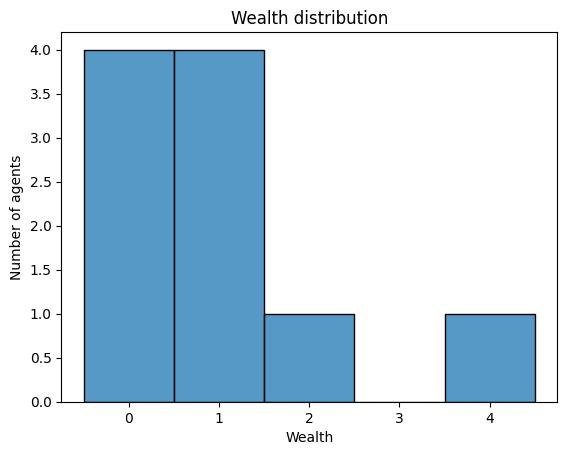

In [63]:
agent_wealth = [a.wealth for a in model.schedule.agents]
# Create a histogram with seaborn
g = sns.histplot(agent_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", 
    ylabel="Number of agents"
);  # The semicolon is just to avoid printing the object representation

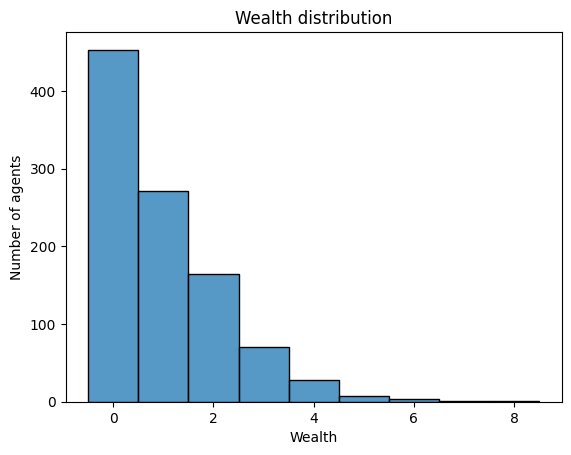

In [64]:
all_wealth = []
# This runs the model 100 times, each model executing 10 steps.
for j in range(100):
    # Run the model
    model = MoneyModel(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", 
      ylabel="Number of agents");

## Mode extendido